In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Trained PSF model results

In [2]:
metrics_dir = '/Users/ec270266/Documents/Phd/Euclid/dev/feature-sed-pred/sed_spectral_classification/psf_model/outputs/wf-outputs/pretrained_models/metrics/'
n_stars_list = [50, 100, 200, 500, 1000, 2000]

metrics = [np.load(metrics_dir+'metrics-polypsf_model_{}.npy'.format(n_stars), allow_pickle=True)[()] for n_stars in n_stars_list]

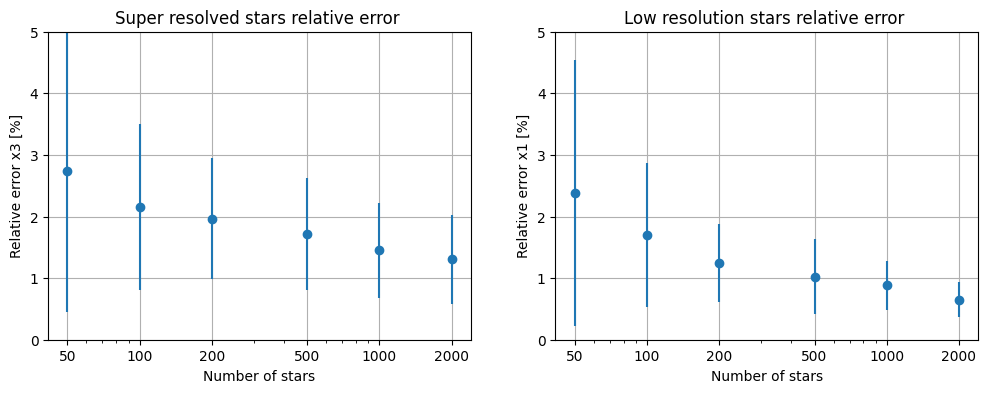

In [3]:
rel_err_SR = [metrics_['test_metrics']['shape_results_dict']['rel_pix_rmse'] for metrics_ in metrics]
rel_err_SR_std = [metrics_['test_metrics']['shape_results_dict']['rel_pix_rmse_std'] for metrics_ in metrics]
rel_err_1x = [metrics_['test_metrics']['poly_metric']['rel_rmse'] for metrics_ in metrics]
rel_err_1x_std = [metrics_['test_metrics']['poly_metric']['std_rel_rmse'] for metrics_ in metrics]

fig, ax = plt.subplots(1,2 , figsize=(12,4))

ax[0].errorbar(n_stars_list, rel_err_SR, yerr=rel_err_SR_std, fmt='o')
ax[0].set_xlabel('Number of stars')
ax[0].set_ylabel('Relative error x3 [%]')
ax[0].set_xscale('log')
ax[0].set_xticks(n_stars_list, [str(n) for n in n_stars_list])
ax[0].grid()
ax[0].set_title('Super resolved stars relative error ')

ax[1].errorbar(n_stars_list, rel_err_1x, yerr=rel_err_1x_std, fmt='o')
ax[1].set_xlabel('Number of stars')
ax[1].set_ylabel('Relative error x1 [%]')
ax[1].set_xscale('log')
ax[1].set_xticks(n_stars_list, [str(n) for n in n_stars_list])
ax[1].grid()
ax[1].set_title('Low resolution stars relative error ')

#unify y axis
ax[0].set_ylim(0, 5)
ax[1].set_ylim(0, 5)
plt.show()

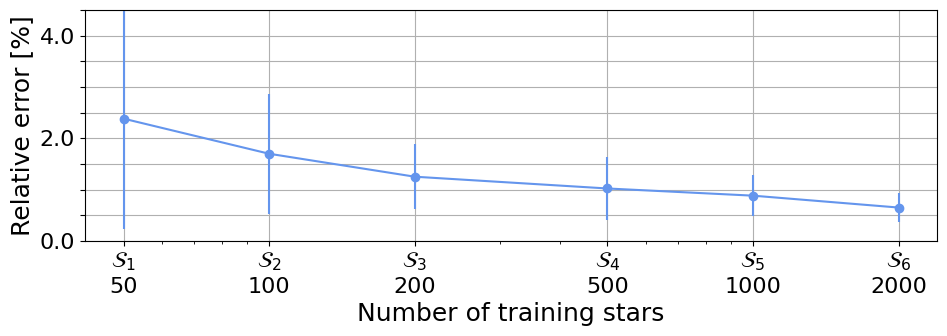

In [16]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(11,3))
plt.errorbar(n_stars_list, rel_err_1x, yerr=rel_err_1x_std, fmt='-o', color='cornflowerblue')
plt.xlabel('Number of training stars', fontsize=18)
plt.ylabel('Relative error [%]', fontsize=18)
plt.xscale('log')
# plt.xticks(n_stars_list, [r'$S_{{{}}}: $'.format(i)+str(n) for i,n in enumerate(n_stars_list)])
plt.xticks(n_stars_list, [r'$\mathcal{{S}}_{{{}}}$'.format(i+1)+'\n'+str(n) for i,n in enumerate(n_stars_list)])

plt.yticks(np.arange(0, 5, 0.5), [0.0,'', '','', 2.0,'', '','', 4.0,''])
plt.grid()
# plt.title('PSF model relative error ', fontsize=22)
plt.ylim(0, 4.5)
# plt.show()
plt.savefig('../figures/psf_model_errors.pdf', bbox_inches='tight')

In [5]:
# np.save('rel_err_1x.npy', rel_err_1x)

# Load the lower zk order models

In [13]:
metrics_dir_25zks = '/Users/ec270266/Documents/Phd/Euclid/dev/feature-sed-pred/sed_spectral_classification/psf_model/outputs/wf-outputs/pretrained_models_25zks/metrics/'
metrics_25zks = [np.load(metrics_dir_25zks+'metrics-polypsf_model_{}_25zks.npy'.format(n_stars), allow_pickle=True)[()] for n_stars in n_stars_list]

metrics_dir_15zks = '/Users/ec270266/Documents/Phd/Euclid/dev/feature-sed-pred/sed_spectral_classification/psf_model/outputs/wf-outputs/pretrained_models_15zks/metrics/'
metrics_15zks = [np.load(metrics_dir_15zks+'metrics-polypsf_model_{}_15zks.npy'.format(n_stars), allow_pickle=True)[()] for n_stars in n_stars_list]

In [14]:
rel_err_SR_25zks = [metrics_['test_metrics']['shape_results_dict']['rel_pix_rmse'] for metrics_ in metrics_25zks]
rel_err_SR_std_25zks = [metrics_['test_metrics']['shape_results_dict']['rel_pix_rmse_std'] for metrics_ in metrics_25zks]
rel_err_1x_25zks = [metrics_['test_metrics']['poly_metric']['rel_rmse'] for metrics_ in metrics_25zks]
rel_err_1x_std_25zks = [metrics_['test_metrics']['poly_metric']['std_rel_rmse'] for metrics_ in metrics_25zks]

rel_err_SR_15zks = [metrics_['test_metrics']['shape_results_dict']['rel_pix_rmse'] for metrics_ in metrics_15zks]
rel_err_SR_std_15zks = [metrics_['test_metrics']['shape_results_dict']['rel_pix_rmse_std'] for metrics_ in metrics_15zks]
rel_err_1x_15zks = [metrics_['test_metrics']['poly_metric']['rel_rmse'] for metrics_ in metrics_15zks]
rel_err_1x_std_15zks = [metrics_['test_metrics']['poly_metric']['std_rel_rmse'] for metrics_ in metrics_15zks]

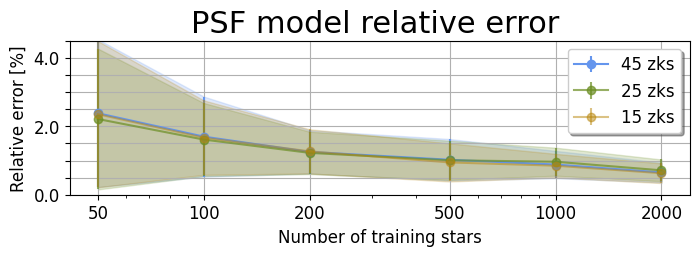

In [20]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,2))
plt.errorbar(n_stars_list, rel_err_1x, yerr=rel_err_1x_std, fmt='-o', color='cornflowerblue', label='45 zks')
plt.fill_between(n_stars_list, np.array(rel_err_1x)-np.array(rel_err_1x_std), np.array(rel_err_1x)+np.array(rel_err_1x_std), color='cornflowerblue', alpha=0.2)
plt.errorbar(n_stars_list, rel_err_1x_25zks, yerr=rel_err_1x_std_25zks, fmt='-o', color='olivedrab', label='25 zks', alpha=0.7)
plt.fill_between(n_stars_list, np.array(rel_err_1x_25zks)-np.array(rel_err_1x_std_25zks), np.array(rel_err_1x_25zks)+np.array(rel_err_1x_std_25zks), color='olivedrab', alpha=0.2)
plt.errorbar(n_stars_list, rel_err_1x_15zks, yerr=rel_err_1x_std_15zks, fmt='-o', color='darkgoldenrod', label='15 zks', alpha=0.5)
plt.fill_between(n_stars_list, np.array(rel_err_1x_15zks)-np.array(rel_err_1x_std_15zks), np.array(rel_err_1x_15zks)+np.array(rel_err_1x_std_15zks), color='darkgoldenrod', alpha=0.2)
plt.legend(fancybox=True, shadow=True)
plt.xlabel('Number of training stars')
plt.ylabel('Relative error [%]')
plt.xscale('log')
plt.xticks(n_stars_list, [str(n) for n in n_stars_list])
plt.yticks(np.arange(0, 5, 0.5), [0.0,'', '','', 2.0,'', '','', 4.0,''])
plt.grid()
plt.title('PSF model relative error ', fontsize=22)
plt.ylim(0, 4.5)
plt.show()

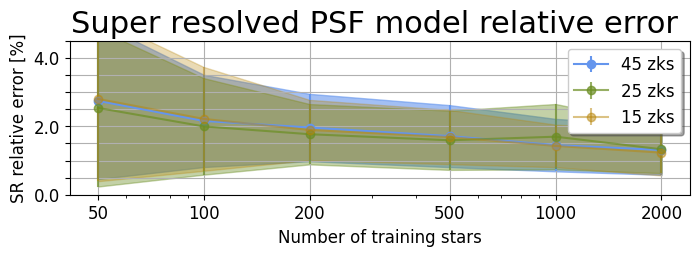

In [26]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,2))
plt.errorbar(n_stars_list, rel_err_SR, yerr=rel_err_SR_std, fmt='-o', color='cornflowerblue', label='45 zks')
plt.fill_between(n_stars_list, np.array(rel_err_SR)-np.array(rel_err_SR_std), np.array(rel_err_SR)+np.array(rel_err_SR_std), color='cornflowerblue', alpha=0.6)
plt.errorbar(n_stars_list, rel_err_SR_25zks, yerr=rel_err_SR_std_25zks, fmt='-o', color='olivedrab', label='25 zks', alpha=0.7)
plt.fill_between(n_stars_list, np.array(rel_err_SR_25zks)-np.array(rel_err_SR_std_25zks), np.array(rel_err_SR_25zks)+np.array(rel_err_SR_std_25zks), color='olivedrab', alpha=0.4)
plt.errorbar(n_stars_list, rel_err_SR_15zks, yerr=rel_err_SR_std_15zks, fmt='-o', color='darkgoldenrod', label='15 zks', alpha=0.5)
plt.fill_between(n_stars_list, np.array(rel_err_SR_15zks)-np.array(rel_err_SR_std_15zks), np.array(rel_err_SR_15zks)+np.array(rel_err_SR_std_15zks), color='darkgoldenrod', alpha=0.3)
plt.legend(fancybox=True, shadow=True)
plt.xlabel('Number of training stars')
plt.ylabel('SR relative error [%]')
plt.xscale('log')
plt.xticks(n_stars_list, [str(n) for n in n_stars_list])
plt.yticks(np.arange(0, 5, 0.5), [0.0,'', '','', 2.0,'', '','', 4.0,''])
plt.grid()
plt.title('Super resolved PSF model relative error ', fontsize=22)
plt.ylim(0, 4.5)
plt.show()

# Check the approximated PSFs

In [28]:
# first need to make predictions with the 15 and 25 zks models
dataset_name_str = '_15zks'

data_id_list = [50, 100, 200, 500, 1000, 2000]
data_dir = '/Users/ec270266/Documents/Phd/Euclid/dev/feature-sed-pred/sed_spectral_classification/output/psf_dataset/'
datasets = [np.load(data_dir + 'train_12000_stars_id_002_8bins_approx_{}_stars.npy'.format(data_id), allow_pickle=True)[()] for data_id in data_id_list]

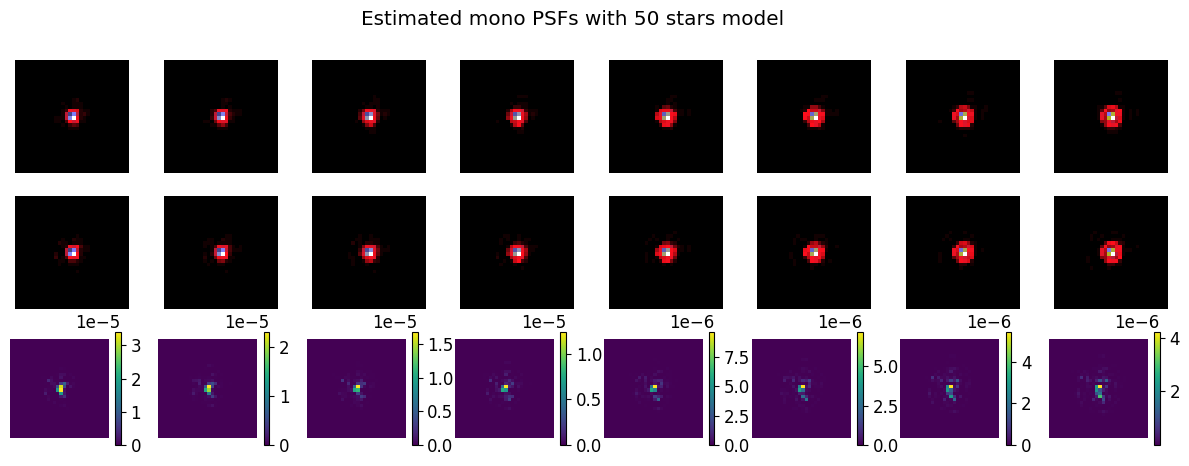

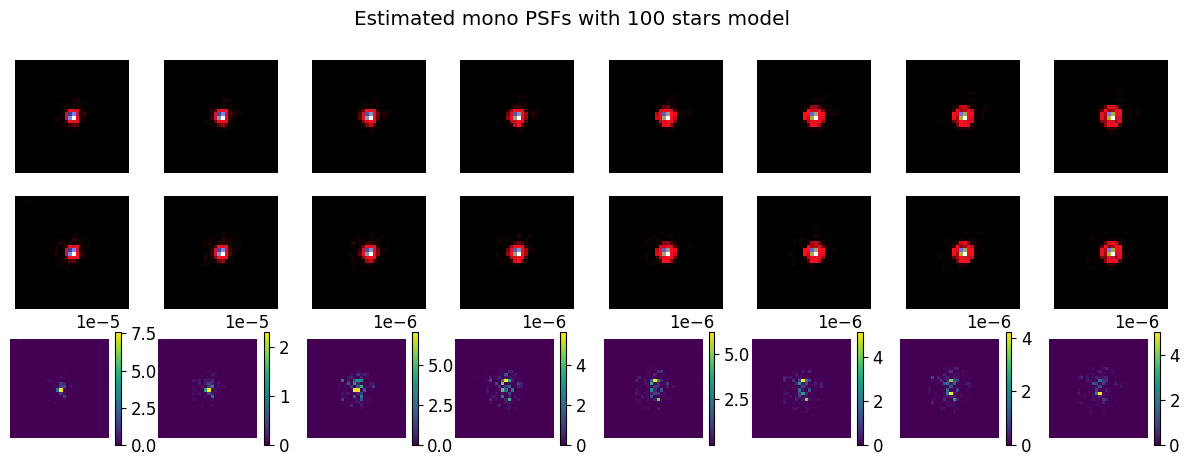

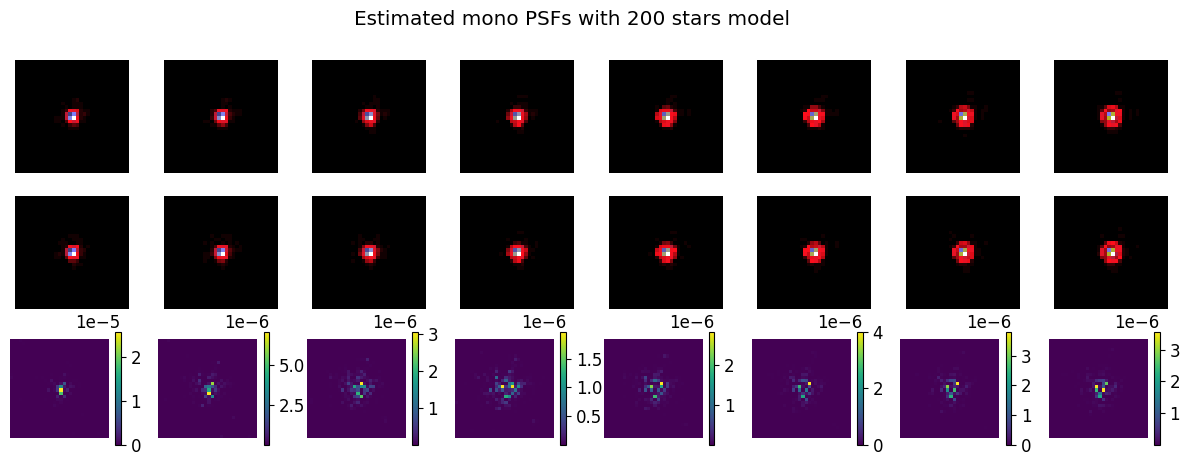

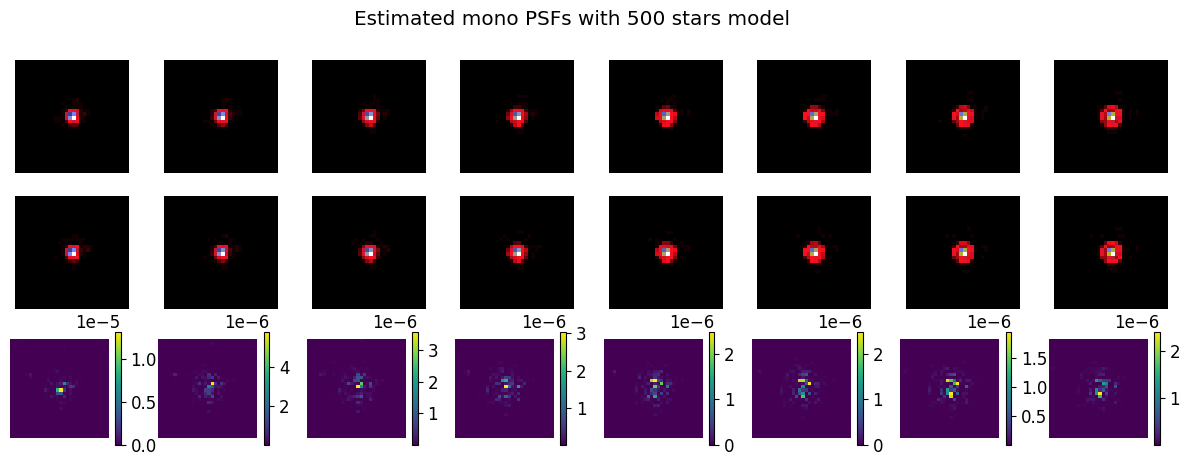

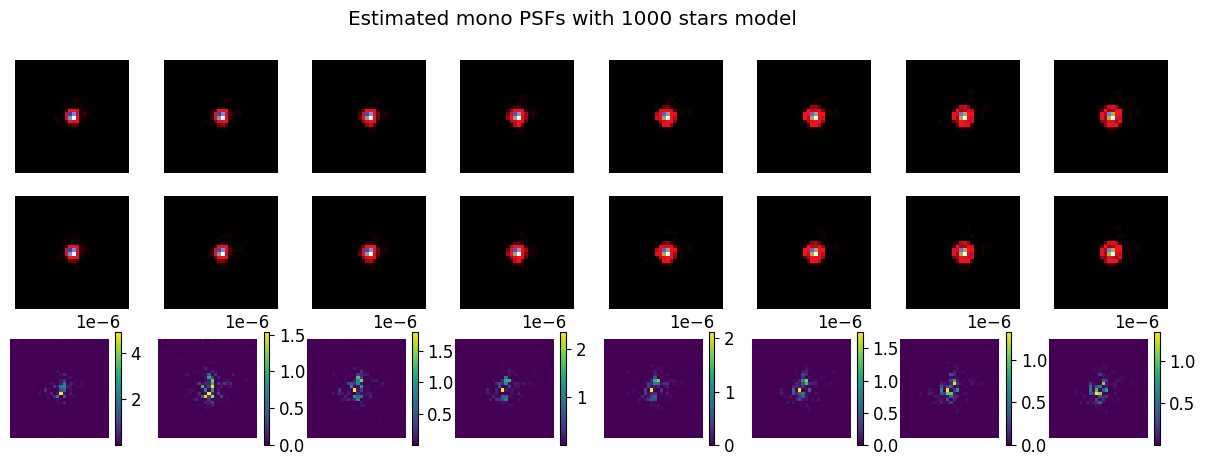

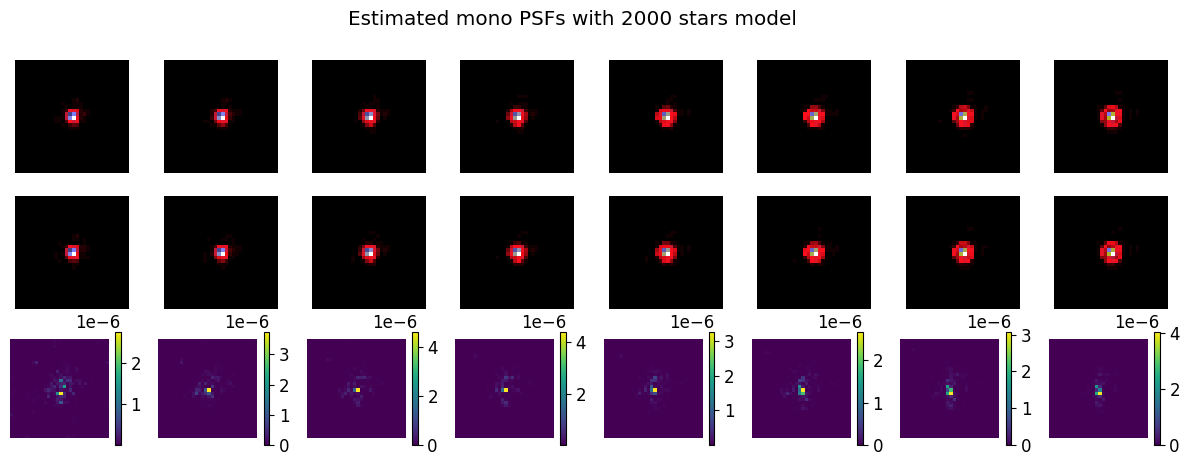

In [29]:
idx = np.random.randint(2000, 12000)
for dataset_, n_train_stars in zip(datasets, data_id_list):
	mono_psfs = dataset_['mono_psfs']
	mono_psfs_approx = dataset_['mono_psfs_approx']
	fig, ax = plt.subplots(3,8, figsize=(15, 5))
	# plot the mono psfs
	for i in range(8):
		ax[0, i].imshow(mono_psfs[idx, i], cmap='gist_stern')
		ax[0,i].set_axis_off()
		ax[1, i].imshow(mono_psfs_approx[idx, i], cmap='gist_stern')
		ax[1,i].set_axis_off()
		im = ax[2, i].imshow((mono_psfs[idx, i] - mono_psfs_approx[idx, i])**2, cmap='viridis')
		plt.colorbar(im, ax=ax[2,i])
		ax[2,i].set_axis_off()
	fig.suptitle('Estimated mono PSFs with {} stars model'.format(n_train_stars))
	plt.show()

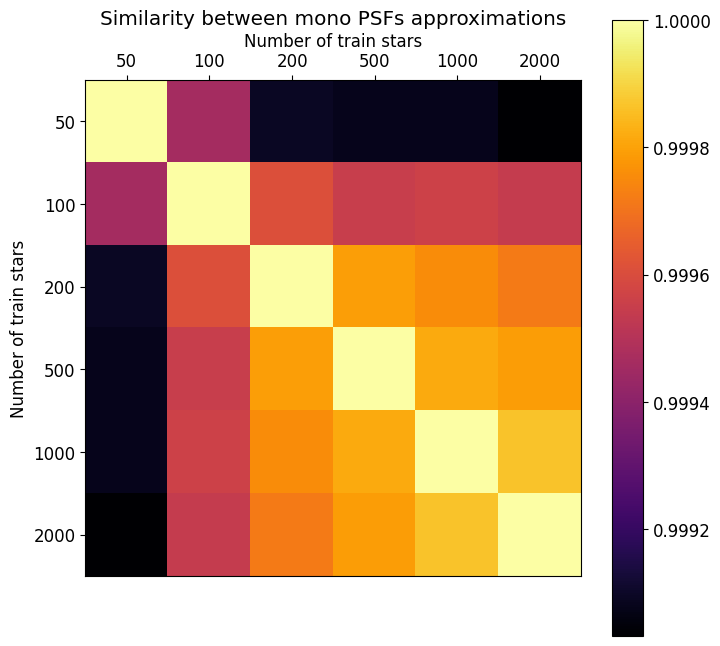

In [30]:
cm = np.zeros((6,6))

plt.figure(figsize=(8,8))
for i in range(6):
	for j in range(6):
		cm[i,j] =np.sum((datasets[i]['mono_psfs_approx']-datasets[j]['mono_psfs_approx'])**2, axis=(1,2,3)).mean()
plt.imshow((1-cm), cmap='inferno')
plt.title('Similarity between mono PSFs approximations')
plt.xticks(np.arange(6), [str(n) for n in data_id_list])
plt.yticks(np.arange(6), [str(n) for n in data_id_list])
plt.xlabel('Number of train stars')
plt.ylabel('Number of train stars')
# x axis on top of the plot
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.colorbar()
plt.show()